## Лабораторная работа №2

#### Минимизация функций с PyGMO



In [ ]:
!pip install pygmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 20.3 MB/s 


In [ ]:
import math
import pygmo
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import numpy as np
from numpy import random
import pygmo as pg

### Создание UPD для функции Матьяса

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Формула:*</font>
<br>
$$
f(x, y) = 0.26 (x^2 + y^2) - 0.48xy,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Глобальный минимум:*</font>
<br>
$$
f(0, 0) = 0,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Метод поиска:*</font>
<br>
$$
-10\leq x,y\leq 10.
$$
<br>

In [ ]:
class MatyasOptimization:

    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float):

        # Set input arguments as attributes, representaing the problem bounds for both design variables
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x):
        # Compute Matyas function value
        function_value = 0.26 * ((x[0] ** 2) + (x[1] ** 2)) - 0.48 * x[0] * x[1] #x = x[0]; y = x[1]

        # Return list
        return [function_value]

### Создание UPD для функции МакКормика

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Формула:*</font>
<br>
$$
f(x, y) = \sin(x + y) + (x - y)^2 - 1.5x + 2.5y + 1,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Глобальный минимум:*</font>
<br><br>
$$
f(-0.54719, -1.54719) = -1.91333,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Метод поиска:*</font>
<br>
$$
-1.5\leq x\leq 4,
$$
$$
-3\leq y\leq 4,
$$
<br>

In [ ]:
class McCormickOptimization:

    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float):

        # Set input arguments as attributes, representaing the problem bounds for both design variables
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x):
        # Compute McCormick function value
        function_value = np.sin(x[0] + x[1]) + ((x[0] - x[1]) ** 2) - 1.5 * x[0] + 2.5 * x[1] + 1 #x = x[0]; y = x[1]

        # Return list
        return [function_value]

### Создание UPD проблемы

In [ ]:
def problem(funcOptimization, start_x, end_x, start_y, end_y):
    # Instantiation of the UDP problem
    udp = funcOptimization(start_x, end_x, start_y, end_y)
    #udp = MatyasOptimization(-10., 10., -10., 10.)

    # Creation of the pygmo problem object
    prob = pygmo.problem(udp)

    # Print the problem's information
    return prob, udp

### Создание алгоритма (Differential Evolution)

In [ ]:
def de_algorithm():
    # Define number of generations
    number_of_generations = 1

    # Fix seed
    current_seed = 171015

    # Create Differential Evolution object by passing the number of generations as input
    de_algo = pygmo.de(gen = number_of_generations, seed = current_seed)

    # Create pygmo algorithm object
    algo = pygmo.algorithm(de_algo)

    # Print the algorithm's information
    return algo, current_seed

### Инициализирование населения

In [ ]:
def population(prob, current_seed):

    # Set population size
    pop_size = 1000

    # Create population
    pop = pygmo.population(prob, size=pop_size, seed=current_seed)

    # Inspect population (this is going to be long, uncomment if desired)
    inspect_pop = False
    if inspect_pop:
        print(pop)
    
    return pop

### Эволюция

In [ ]:
def pop_evolution(pop, algo):
    # Set number of evolutions
    number_of_evolutions = 100

    # Initialize empty containers
    individuals_list = []
    fitness_list = []

    # Evolve population multiple times
    for i in range(number_of_evolutions):
        pop = algo.evolve(pop)
        individuals_list.append(pop.get_x()[pop.best_idx()])
        fitness_list.append(pop.get_f()[pop.best_idx()])

    return pop, individuals_list, fitness_list, number_of_evolutions

### График пригодности

In [ ]:
def draw_fit_history(func_name, udp, individuals_list, fitness_list, number_of_evolutions):
    # Extract best individuals for each generation
    best_x = [ind[0] for ind in individuals_list]
    best_y = [ind[1] for ind in individuals_list]

    # Extract problem bounds
    (x_min, y_min), (x_max, y_max) = udp.get_bounds()

    # Plot fitness over generations
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Function value')

    # Plot champion
    champion_n = np.argmin(np.array(fitness_list))
    ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r', label='All-time champion')

    # Prettify
    ax.set_xlim((0, number_of_evolutions))
    ax.grid('major')
    ax.set_title('Best individual of each generation', fontweight='bold')
    ax.set_xlabel('Number of generation')
    ax.set_ylabel(str(func_name) + r' value $f(x,y)$')
    ax.legend(loc='upper right')
    ax.set_yscale('symlog')
    plt.tight_layout()

    # Show the figure
    plt.show()

    return x_min, x_max, y_min, y_max, best_x, best_y

### График с лучшими особями каждого поколения

In [ ]:
def draw_best_individual(func_name, udp, x_min, x_max, y_min, y_max, best_x, best_y):
    # Plot optimization function
    grid_points = 100
    x_vector = np.linspace(x_min, x_max, grid_points)
    y_vector = np.linspace(y_min, y_max, grid_points)
    x_grid, y_grid = np.meshgrid(x_vector, y_vector)
    z_grid = np.zeros((grid_points, grid_points))
    for i in range(x_grid.shape[1]):
        for j in range(x_grid.shape[0]):
            z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]

    # Create figure
    fig, ax = plt.subplots(figsize=(9,5))
    cs = ax.contour(x_grid, y_grid, z_grid, 50)

    # Plot best individuals of each generation
    ax.scatter(best_x, best_y, marker='x', color='r')

    # Prettify
    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.set_title(str(func_name), fontweight='bold')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    cbar = fig.colorbar(cs)
    cbar.ax.set_ylabel(str(func_name) + r' value $f(x,y)$')
    plt.tight_layout()

    # Show the plot
    plt.show()

### Увеличенный оптимум в точке

In [ ]:
def draw_best_individual_zoom(func_name, udp, pop, min_x, min_y, best_x, best_y):
    eps = 2E-3
    x_min, x_max = (min_x - eps, min_x + eps)
    y_min, y_max = (min_y - eps, min_y + eps)
    grid_points = 100
    x_vector = np.linspace(x_min, x_max, grid_points)
    y_vector = np.linspace(y_min, y_max, grid_points)
    x_grid, y_grid = np.meshgrid(x_vector, y_vector)
    z_grid = np.zeros((grid_points, grid_points))
    for i in range(x_grid.shape[1]):
        for j in range(x_grid.shape[0]):
            z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]
    fig, ax = plt.subplots(figsize=(9, 5))
    cs = ax.contour(x_grid, y_grid, z_grid, 50)
    # Plot best individuals of each generation
    ax.scatter(best_x, best_y, marker='x', color='r', 
               label='Best individual of each generation')
    ax.scatter(pop.champion_x[0], pop.champion_x[1], marker='x', color='k', 
               label='Champion')
    # Prettify
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%1.5f'))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.5f'))
    plt.xticks(rotation=45)
    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.set_title('Vicinity of ' + str(min_x) + ', ' + str(min_y), 
                 fontweight='bold')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    cbar = fig.colorbar(cs)
    cbar.ax.set_ylabel(str(func_name) + r' value $f(x,y)$')
    ax.legend(loc='lower right')
    ax.grid('major')
    plt.tight_layout()

    # Show the figure
    plt.show()

### Поиск по сетке

In [ ]:
def grid_search(udp):
    # Set number of points
    number_of_nodes = 1000

    # Extract problem bounds
    (x_min, y_min), (x_max, y_max) = udp.get_bounds()
    x_vector = np.linspace(x_min, x_max, number_of_nodes)
    y_vector = np.linspace(y_min, y_max, number_of_nodes)
    x_grid, y_grid = np.meshgrid(x_vector, y_vector)
    z_grid = np.zeros((number_of_nodes, number_of_nodes))
    for i in range(x_grid.shape[1]):
        for j in range(x_grid.shape[0]):
            z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]

    # Extract the best individual
    best_f = np.min(z_grid)
    best_ind = np.argmin(z_grid)
    best_x_GS = (x_grid.flatten()[best_ind], y_grid.flatten()[best_ind])

    return number_of_nodes, best_f, best_x_GS

### Поиск по методу Монте-Карло

In [ ]:
def monte_carlo_search(udp, current_seed, x_max, x_min, y_max, y_min):
    # Fix seed (for reproducibility)
    random.seed(current_seed)

    # Size of random number vector
    number_of_points = 1000
    x_vector = random.random(number_of_points)
    x_vector *= (x_max - x_min)
    x_vector += x_min
    y_vector = random.random(number_of_points)
    y_vector *= (y_max - y_min)
    y_vector += y_min
    x_grid, y_grid = np.meshgrid(x_vector, y_vector)
    z_grid = np.zeros((number_of_points, number_of_points))
    for i in range(x_grid.shape[1]):
        for j in range(x_grid.shape[0]):
            z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]

    # Get the best individual
    best_f = np.min(z_grid)
    best_ind = np.argmin(z_grid)
    best_x_MC = (x_grid.flatten()[best_ind], y_grid.flatten()[best_ind])

    return number_of_points, best_f, best_x_MC

In [ ]:

def main(funcOptimization, func_name, start_x, end_x, start_y, end_y, min_x, min_y):


    print('            THE START OF CALCULATIONS            \n')

    # Creating problem
    pr, udp = problem(funcOptimization, start_x, end_x, start_y, end_y)
    print(pr)

    # Creating algorithm
    alg, cur_seed = de_algorithm()
    print(alg)

    # Initialising population
    pop = population(pr, cur_seed)

    # Evolving population
    pop_evol, ind_list, fit_list, num_evols = pop_evolution(pop, alg)
    # Extract the best individual
    print('\n            PRINTING CHAMPION INDIVIDUALS            \n')
    print('Fitness (= function) value: ', pop_evol.champion_f)
    print('Decision variable vector: ', pop_evol.champion_x)
    print('Number of function evaluations: ', pop_evol.problem.get_fevals())
    print('Difference wrt the minimum: ', pop_evol.champion_x - np.array([min_x, min_y]))
    print()


    # Fitness history
    x_min, x_max, y_min, y_max, x_best, y_best = draw_fit_history(func_name, 
                                                                  udp, ind_list, 
                                                                  fit_list, 
                                                                  num_evols)

    # Best individual of each generation
    draw_best_individual(func_name, udp, x_min, x_max, y_min, y_max, x_best, y_best)

    # Zoom of the best individual of each generation
    draw_best_individual_zoom(func_name, udp, pop_evol, min_x, min_y, x_best, y_best)

    # Grid search
    nodes_num, best_f, best_x_GS = grid_search(udp)
    print('\n            RESULTS OF GRID SEARCH (' + str(nodes_num) + ' nodes per variable)             ')
    print('Best fitness with grid search (' + str(nodes_num) + ' points):', best_f)
    print('Decision variable vector: ', best_x_GS)
    print('Number of function evaluations: ', nodes_num**2)
    print('Difference wrt the minimum: ', best_x_GS - np.array([min_x, min_y]))

    # Monte-Carlo search
    p_num, best_f, best_x_MC = monte_carlo_search(udp, cur_seed, x_max, x_min, 
                                                  y_max, y_min)
    print('\n            RESULTS OF MONTE-CARLO SEARCH (' + str(p_num) + ' points per variable) ' +                                                                                   '########### ')
    print('Best fitness with grid search (' + str(p_num) + ' points):', best_f)
    print('Decision variable vector: ', best_x_MC)
    print('Number of function evaluations: ', p_num**2)
    print('Difference wrt the minimum: ', best_x_MC - np.array([min_x, min_y]))

    print('\n            THE END OF CALCULATIONS            \n\n')

### Функция Матьяса
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Формула:*</font>
<br>
$$
f(x, y) = 0.26 (x^2 + y^2) - 0.48xy,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Глобальный минимум:*</font>
<br>
$$
f(0, 0) = 0,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Метод поиска:*</font>
<br>
$$
-10\leq x,y\leq 10.
$$
<br>




            THE START OF CALCULATIONS            

Problem name: <class '__main__.MatyasOptimization'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 171015

            PRINTING CHAMPION INDIVIDUALS            

Fitness (= function) value:  [1.73876596e-18]
Decision variable vector:  [6.30181525e-09 4.91546403

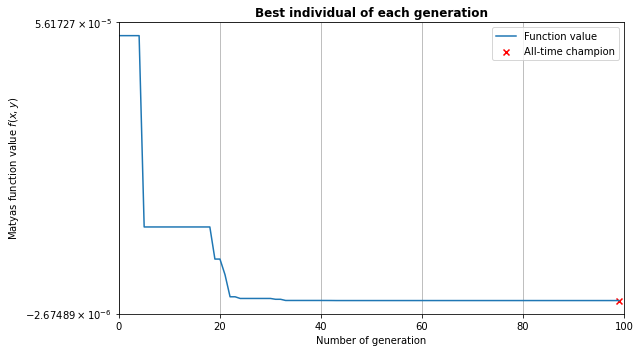

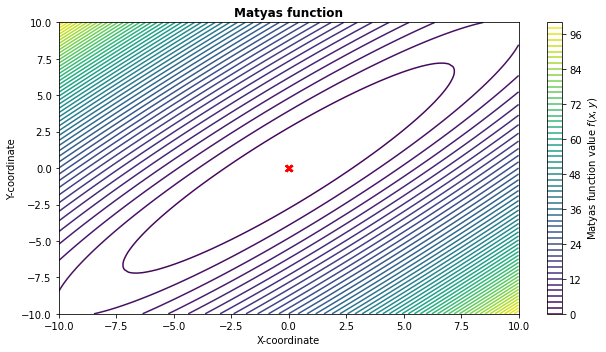

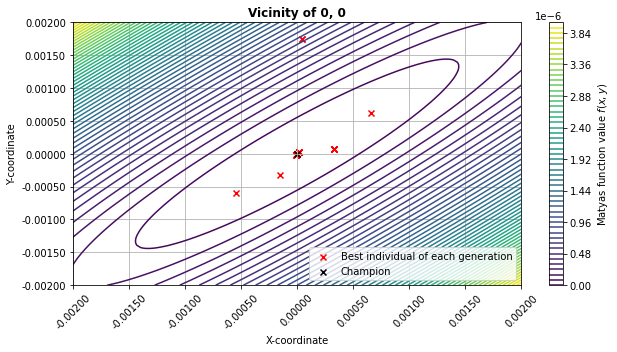


            RESULTS OF GRID SEARCH (1000 nodes per variable)             
Best fitness with grid search (1000 points): 4.008012016020028e-06
Decision variable vector:  (-0.010010010010010006, -0.010010010010010006)
Number of function evaluations:  1000000
Difference wrt the minimum:  [-0.01001001 -0.01001001]

            RESULTS OF MONTE-CARLO SEARCH (1000 points per variable) ########### 
Best fitness with grid search (1000 points): 3.511919401422671e-06
Decision variable vector:  (-0.008476825258760812, -0.009521144021203298)
Number of function evaluations:  1000000
Difference wrt the minimum:  [-0.00847683 -0.00952114]

            THE END OF CALCULATIONS            




In [ ]:
x = 0
y = 0
x_left = -10.
x_right = 10.
y_left = -10.
y_right = 10.

Matyas_opt = main(MatyasOptimization, 'Matyas function', 
                  x_left, x_right, y_left, y_right, x, y)

### Функция МакКормика
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Формула:*</font>
<br>
$$
f(x, y) = \sin(x + y) + (x - y)^2 - 1.5x + 2.5y + 1,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Глобальный минимум:*</font>
<br><br>
$$
f(-0.54719, -1.54719) = -1.91333,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Метод поиска:*</font>
<br>
$$
-1.5\leq x\leq 4,
$$
$$
-3\leq y\leq 4,
$$
<br>

            THE START OF CALCULATIONS            

Problem name: <class '__main__.McCormickOptimization'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-1.5, -3]
	Upper bounds: [4, 4]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 171015

            PRINTING CHAMPION INDIVIDUALS            

Fitness (= function) value:  [-1.91322295]
Decision variable vector:  [-0.54719756 -1.54719756]
Nu

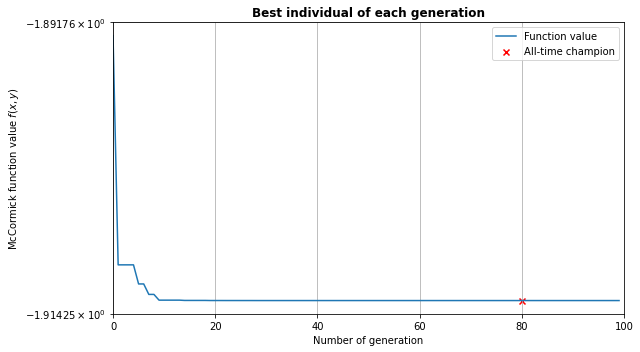

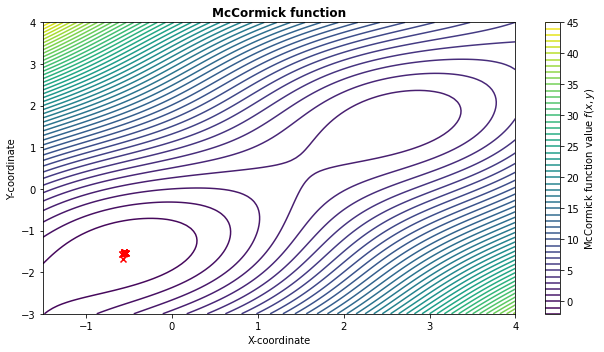

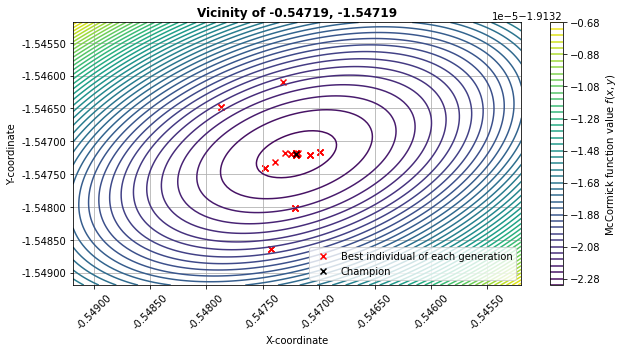


            RESULTS OF GRID SEARCH (1000 nodes per variable)             
Best fitness with grid search (1000 points): -1.913215787286358
Decision variable vector:  (-0.5475475475475475, -1.5495495495495495)
Number of function evaluations:  1000000
Difference wrt the minimum:  [-0.00035755 -0.00235955]

            RESULTS OF MONTE-CARLO SEARCH (1000 points per variable) ########### 
Best fitness with grid search (1000 points): -1.9132204615968553
Decision variable vector:  (-0.5485978357453356, -1.547457672056669)
Number of function evaluations:  1000000
Difference wrt the minimum:  [-0.00140784 -0.00026767]

            THE END OF CALCULATIONS            




In [ ]:
x = -0.54719
y = -1.54719
x_left = -1.5
x_right = 4.
y_left = -3.
y_right = 4.

McCormick_opt = main(McCormickOptimization, 'McCormick function', 
                     x_left, x_right, y_left, y_right, x, y)